**Now set dx= 500m and dt=100s to get C = 0.1; what do you see and how would you interpret it?**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [12]:
# problem parameters
c=0.5       # Advection speed [m s-1]
dx=500      # X resolution [m]
dt=100      # time step [s]
t0=0.       # initial time
tmax=0.1    # duration of simulation [days]
xmax=10.0e3 # length of the basin [m]

# Parameters of the initial temperature distribution
T0 = 15.        # baseline temperature [degC]
sigma = 2000.   # width at half amplitude [m]
A = 5.          # amplitude [degC]

In [13]:
# Spatial shape of the temperature disturbance
def Gaussian(x):
    y = T0+A*np.exp(-(x/sigma)**2)
    return y

In [14]:
# time axis
NT = int(np.floor(tmax*86400/dt))+1  # number of steps (starts from 0)
# X axis (centred at 0)
x = np.arange(-xmax,xmax,dx)
IM = len(x)             # number of grid points
T = np.zeros([IM,NT])     # the array holding the numerical solution 
print('Grid steps : ',IM)
print('Number of time steps : ',NT)
print('Timestep = ',dt,' s')
print('Max numerical speed DX/DT = ',dx/dt,' m/s')
print('Physical speed = ',c,' m/s')
print('Courant number = ',c*dt/dx)

Grid steps :  40
Number of time steps :  87
Timestep =  100  s
Max numerical speed DX/DT =  5.0  m/s
Physical speed =  0.5  m/s
Courant number =  0.1


In [15]:
# Compute the numerical solution using a time loop over the number of time steps
T[:,0] = Gaussian(x)    # initial condition

for n in range(NT-1):
    # Question 1
    T[0,n+1]  = T0
    T[-1,n+1] = T0
    
    rhs = -c*(T[2:,n]-T[:-2,n])/(2.*dx) 
    T[1:-1,n+1] = T[1:-1,n] + rhs*dt   

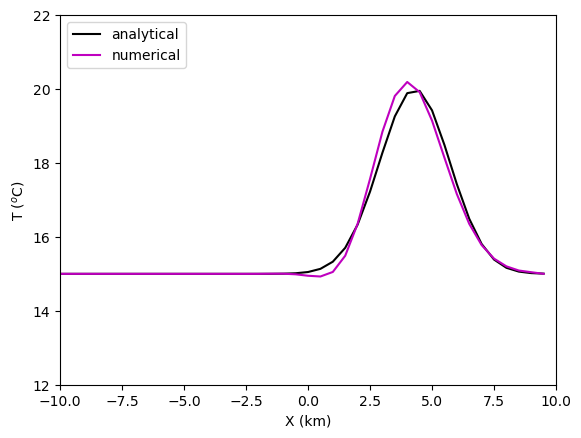

In [16]:
fig, ax = plt.subplots()
# set the axis limits
plt.axis([-xmax/1000, xmax/1000, T0-3, T0+7])
# first plot the initial conditions and set the line attributes
line, = ax.plot(x/1000., Gaussian(x),'k',label='analytical')
sol, = ax.plot(x/1000., T[:,0],'m',label='numerical')
ax.set_xlabel('X (km)')
ax.set_ylabel('T ($^o$C)')
plt.legend(loc='upper left')

def animate(i):
    t = t0 + i*dt
    line.set_ydata(Gaussian(x-c*t))  # update the analytical solution
    sol.set_ydata(T[:,i])  # update the numerical solution
    return line,sol,

# create the animation and loop (interval is in ms)
ani = animation.FuncAnimation(
    fig, animate, interval=dt, blit=True, frames=NT, repeat=True)

# To save the animation, use e.g.
# ani.save("movie.mp4")
# or
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

# display the animation as a javascript object embedded in the notebook
from IPython.display import HTML
HTML(ani.to_jshtml())

This leads to a slower advection speed, resulting in a smaller peak compared to the previous changes. The advection is slower and yet the analytical and numerical curves become out of sync at a point instead of simply differing in peak heights. Deviating from 1 towards a small courant number leads to instability as the advection speed differs from the grid spacing. Reducing the courant number too much leads to numerical instability. Closer to the basin boundary, the numerical colution's plot appears to slow down. This makes sense as the speed is reduced.